| ESCUELA POLITÉCNICA NACIONAL  |                              |              |
|-------------------------------|------------------------------|--------------|
| **Estructuras de Datos y Algoritmos II – Computación**     | | **Proyecto**        |
| NOMBRES:                      |   Ivonne Carolina Ayala      |              |
|                               |   David Esteban Morales      |              |
|                               |   Brandon Ismael Freire      |              |

## Proyecto Bimestre 1

### 1. OBJETIVOS

   - Implementar y analizar los algoritmos de Búsqueda en Anchura (BFS) y Búsqueda en Profundidad (DFS) en Python, empleando el paradigma orientado a objetos y la estructura de datos grafo, para comprender su aplicación en la resolución de problemas de conectividad en grafos.
   
   - Diseñar e implementar una estructura de datos para grafos utilizando clases en Python, definiendo las clases Grafo, Nodo y Arista para representar los componentes básicos de un grafo.

   - Implementar la funcionalidad de seguimiento de rutas en ambos algoritmos, para identificar caminos específicos entre un nodo de inicio y un nodo de destino, evaluando el comportamiento de ambos en el problema planteado.

### 2. INTRODUCCIÓN

En el área de la computación, los grafos representan una de las estructuras de datos fundamentales, utilizadas para modelar un gran número de sistemas complejos como redes sociales, medios de transporte, redes y mapas de rutas/caminos. Un grafo se basa en un conjunto de nodos (también llamados vértices) conectados entre sí mediante aristas, puede ser dirigido o no dirigido, y con pesos o sin pesos. Por lo que, la representación y manipulación de grafos es importante en la resolución de diferentes problemas, independientemente de si sean computacionales o no.

En el presente informe, se abordan dos algoritmos fundamentales estudiados hasta el momento: Breadth-first Search (BFS) y Depth-first Search (DFS), cada uno de estos implementados en Python, siguiendo el paradigma orientado a objetos. Para ello, se definieron las clases *Grafo*, *Nodo* y *Arista*, que permiten construir y manipular grafos de manera más flexible. 

El primero, el algoritmo BFS explora los nodos vecinos de un nivel antes de pasar al siguiente. Dicho de otro modo, se expande hacia fuera desde el nodo inicial, lo que lo hace ideal para encontrar la ruta mas corta. 

BFS sigue los siguientes pasos generales:

1) Inicialización: Se selecciona un vértice origen y crea una cola vacía. Marca el vértice origen como encolado y lo encola.

2) Exploración/Búsqueda: Mientras la cola no esté vacía, realiza los siguientes pasos: 

   a. Desencola el siguiente vértice en la cola. 
   
   b. Procesa el vértice (por ejemplo; se lo puede imprimir o guardar en una lista de vértices visitados, etc.). 
   
   c. Encuentra todos los vértices adyacentes al vértice origen que no han sido encolados y los marca como encolados. A continuación, encola estos vértices en la cola.

3) Finalización: Cuando la cola esté vacía, el algoritmo BFS habrá visitado todos los vértices alcanzables desde el vértice origen, lo que temrinará el programa.

Por otro lado, el algoritmo DFS explora tan lejos como sea posible a partir de cada nodo antes de retroceder, lo cual es útil en problemas de conectividad, como resolución de laberintos y problemas de búsqueda de rutas/caminos.

1) Inicialización: Se selecciona un nodo de inicio, y se inicializan variables para rastrear la ruta y la profundidad.

2) Exploración/Búsqueda: Se la realiza de manera recursiva y partiendo del nodo inicio especificado.

3) Finalización: Después de haber completado la exploración, se devuelve el path (el camino mas largo encontrado) y la profundidad máxima alcanzada.

### 3. EJERCICIOS PLANTEADOS Y/O PROGRAMAS IMPLEMENTADOS

1. Dados los algoritmos BFS y DFS, realizar la implementación en Python siguiendo el paradigma orientado a objetos y el ADT de grafo (debería definir las clases Grafo, Nodo y Arista).

2. Muestre la ejecución de los dos algoritmos con un ejemplo de grafo (ingreso por consola o por archivo). Asuma la aplicación de BFS y DFS en casos de uso reales (por ejemplo: las salidas de evacuación en un campus universitario) y describa el caso de ejemplo o definición del problema y la demo del algoritmo. Debería desplegarse el resultado para:

   a. BFS: la ruta más corta de nodo Start al nodo Finish

   b. DFS: la ruta más profunda de nodo Start al nodo Finish

3. Prepare un video de 10 a 15 minutos de duración con la presentación de su proyecto (proyección de pantalla y proyección de expositor) y súbalo a Facebook o Youtube. Comparta el link del video en el grupo de whatsapp de la materia. Tiene al menos 20 likes??

4. Suba el informe del proyecto en el aula virtual. Debe tener la estructura de un informe (objetivos, introducción, desarrollo, conclusiones y referencias) con su código comentado, con los resultados de pruebas de ejecución de los algoritmos, y con el link del video de la demo.

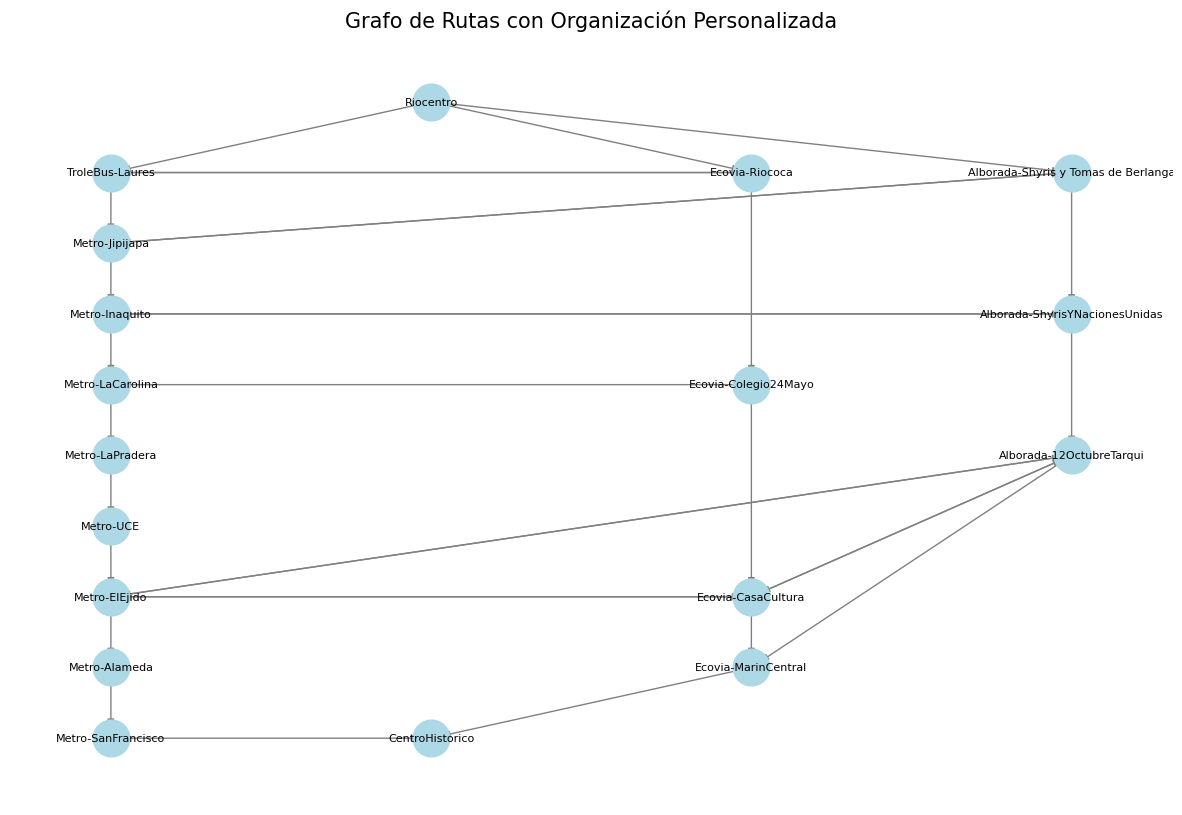

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Definición del grafo
grafo_dict = {
    'Riocentro': ['TroleBus-Laures', 'Ecovia-Riococa', 'Alborada-Shyris y Tomas de Berlanga'],
    'TroleBus-Laures': ['Metro-Jipijapa', 'Ecovia-Riococa'],
    'Ecovia-Riococa': ['TroleBus-Laures', 'Ecovia-Colegio24Mayo'],
    'Alborada-Shyris y Tomas de Berlanga': ['Alborada-ShyrisYNacionesUnidas', 'Metro-Jipijapa'],
    'Metro-Jipijapa': ['Metro-Inaquito', 'Alborada-Shyris y Tomas de Berlanga'],
    'Ecovia-Colegio24Mayo': ['Metro-LaCarolina', 'Ecovia-CasaCultura'],
    'Alborada-ShyrisYNacionesUnidas': ['Metro-Inaquito', 'Alborada-12OctubreTarqui'],
    'Metro-Inaquito': ['Metro-LaCarolina', 'Alborada-ShyrisYNacionesUnidas'],
    'Metro-LaCarolina': ['Metro-LaPradera'],
    'Ecovia-CasaCultura': ['Metro-ElEjido', 'Alborada-12OctubreTarqui', 'Ecovia-MarinCentral'],
    'Alborada-12OctubreTarqui': ['Ecovia-CasaCultura', 'Metro-ElEjido', 'Ecovia-MarinCentral'],
    'Metro-LaPradera': ['Metro-UCE'],
    'Metro-ElEjido': ['Metro-Alameda', 'Alborada-12OctubreTarqui', 'Ecovia-CasaCultura'],
    'Ecovia-MarinCentral': ['CentroHistorico'],
    'Metro-UCE': ['Metro-ElEjido'],
    'Metro-Alameda': ['Metro-SanFrancisco'],
    'Metro-SanFrancisco': ['CentroHistorico']
}

G = nx.DiGraph()

for nodo, vecinos in grafo_dict.items():
    for vecino in vecinos:
        G.add_edge(nodo, vecino)

pos = {
    'Riocentro': (0, 5),
    'TroleBus-Laures': (-1, 4),
    'Ecovia-Riococa': (1, 4),
    'Alborada-Shyris y Tomas de Berlanga': (2, 4),
    'Metro-Jipijapa': (-1, 3),
    'Metro-Inaquito': (-1, 2),
    'Metro-LaCarolina': (-1, 1),
    'Metro-LaPradera': (-1, 0),
    'Metro-UCE': (-1, -1),
    'Metro-ElEjido': (-1, -2),
    'Metro-Alameda': (-1, -3),
    'Metro-SanFrancisco': (-1, -4),
    'CentroHistorico': (0, -4),
    'Ecovia-Colegio24Mayo': (1, 1),
    'Ecovia-CasaCultura': (1, -2),
    'Ecovia-MarinCentral': (1, -3),
    'Alborada-ShyrisYNacionesUnidas': (2, 2),
    'Alborada-12OctubreTarqui': (2, 0)
}

plt.figure(figsize=(15, 10))

nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

nx.draw_networkx_edges(G, pos, edge_color='gray', arrows=True)

plt.title("Grafo de Rutas con Organización Personalizada", fontsize=15)
plt.axis('off')
plt.show()


### 4. CONCLUSIONES


### 5. REFERENCIAS BIBLIOGRÁFICAS
Para este informe se utilizó la informacion de la siguiente fuente:

- 


### 6. DECLARACIÓN DE USO DE IA
En esta práctica utilicé GPT para revisar y mejorar mi redacción, así como para optimizar la sintaxis de mi trabajo. Además  me ayudó a identificar y corregir los errores que cometí durante el desarrollo de la práctica.